### Glass Identification

#### Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

#### Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
    
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
#### Predict : Type of glass


In [111]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [112]:
#read data from github link
columns=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass']
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', names=columns )
data.sample(7)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
161,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
137,138,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00,2
46,47,1.51869,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,1
195,196,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7
128,129,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17,2
200,201,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.00,7
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1


In [113]:
data.shape

(214, 11)

#### Rows : 214  ,   Columns : 11

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


#### ID column is just an ID, so dropping the column

In [115]:
data.drop(['Id'], axis=1, inplace=True)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [116]:
data.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

#### No null values in dataset

#### # Check for blank values in dataset

In [117]:
for column in data:
    
    print(data[column].value_counts())
    

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64
8.03    5
8.43    5
9.57    4
8.79    4
8.44    4


#### Observation : No Null Values in dataset

#### # Unique values in data

In [118]:
data.nunique()

RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type_of_glass      6
dtype: int64

#### Observation : Our target variable is "Type_of_glass" column, which is having 6 unique values so our problem is related to Classification Problem

### # EDA

#### # Basic Stats

In [119]:
# First converting the int64 data type to float64
data['Type_of_glass']=data['Type_of_glass'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type_of_glass  214 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


#### All the data is now in 'float64' type

In [120]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### # Dist Plot

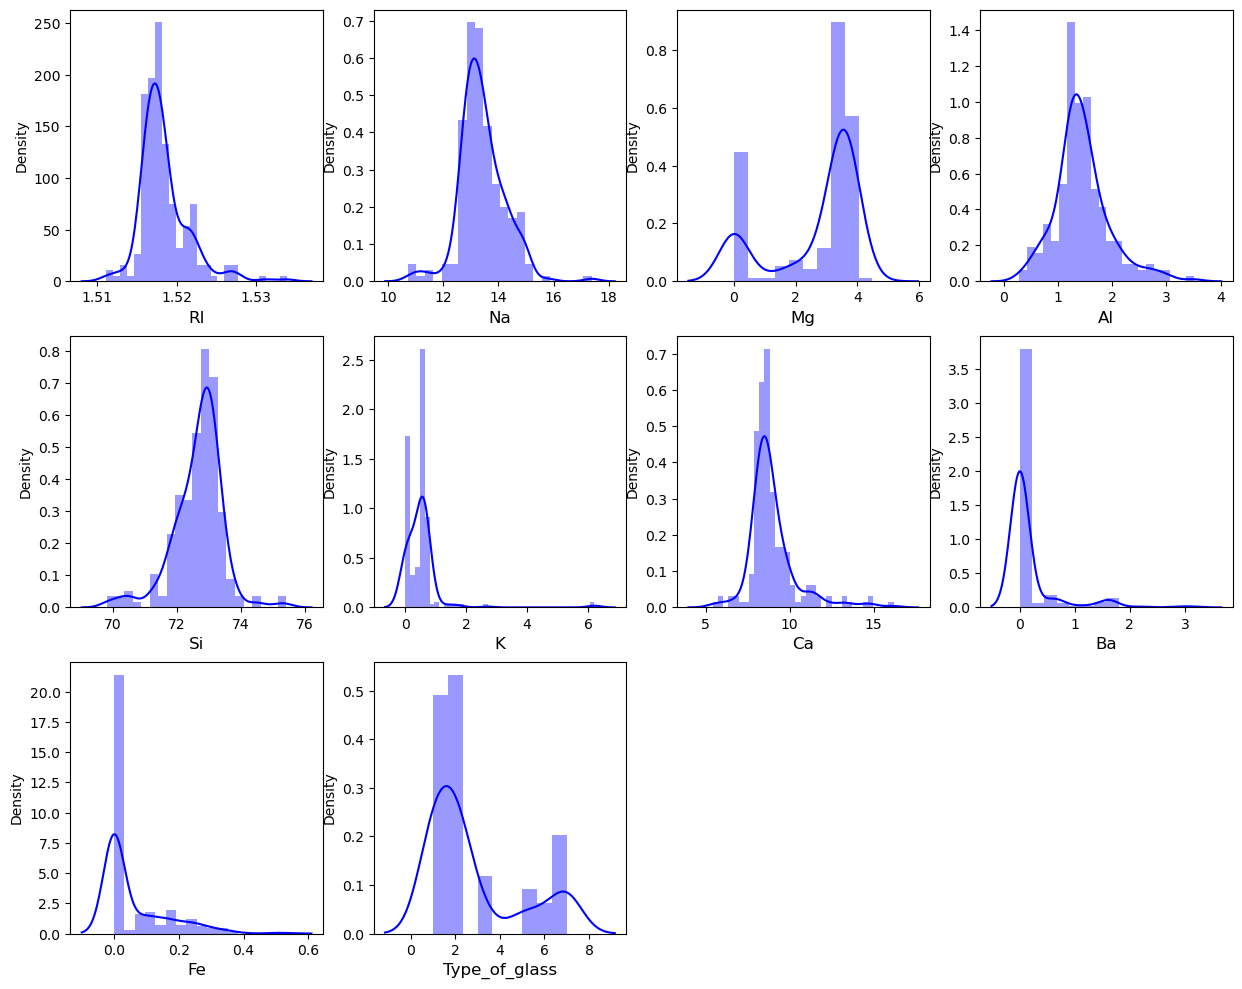

In [121]:
plt.figure(figsize=(15,12))
pltno=1
for column in data:
    if pltno<=10:
        plt.subplot(3,4,pltno)
        sns.distplot(data[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Skewness visible from the plots

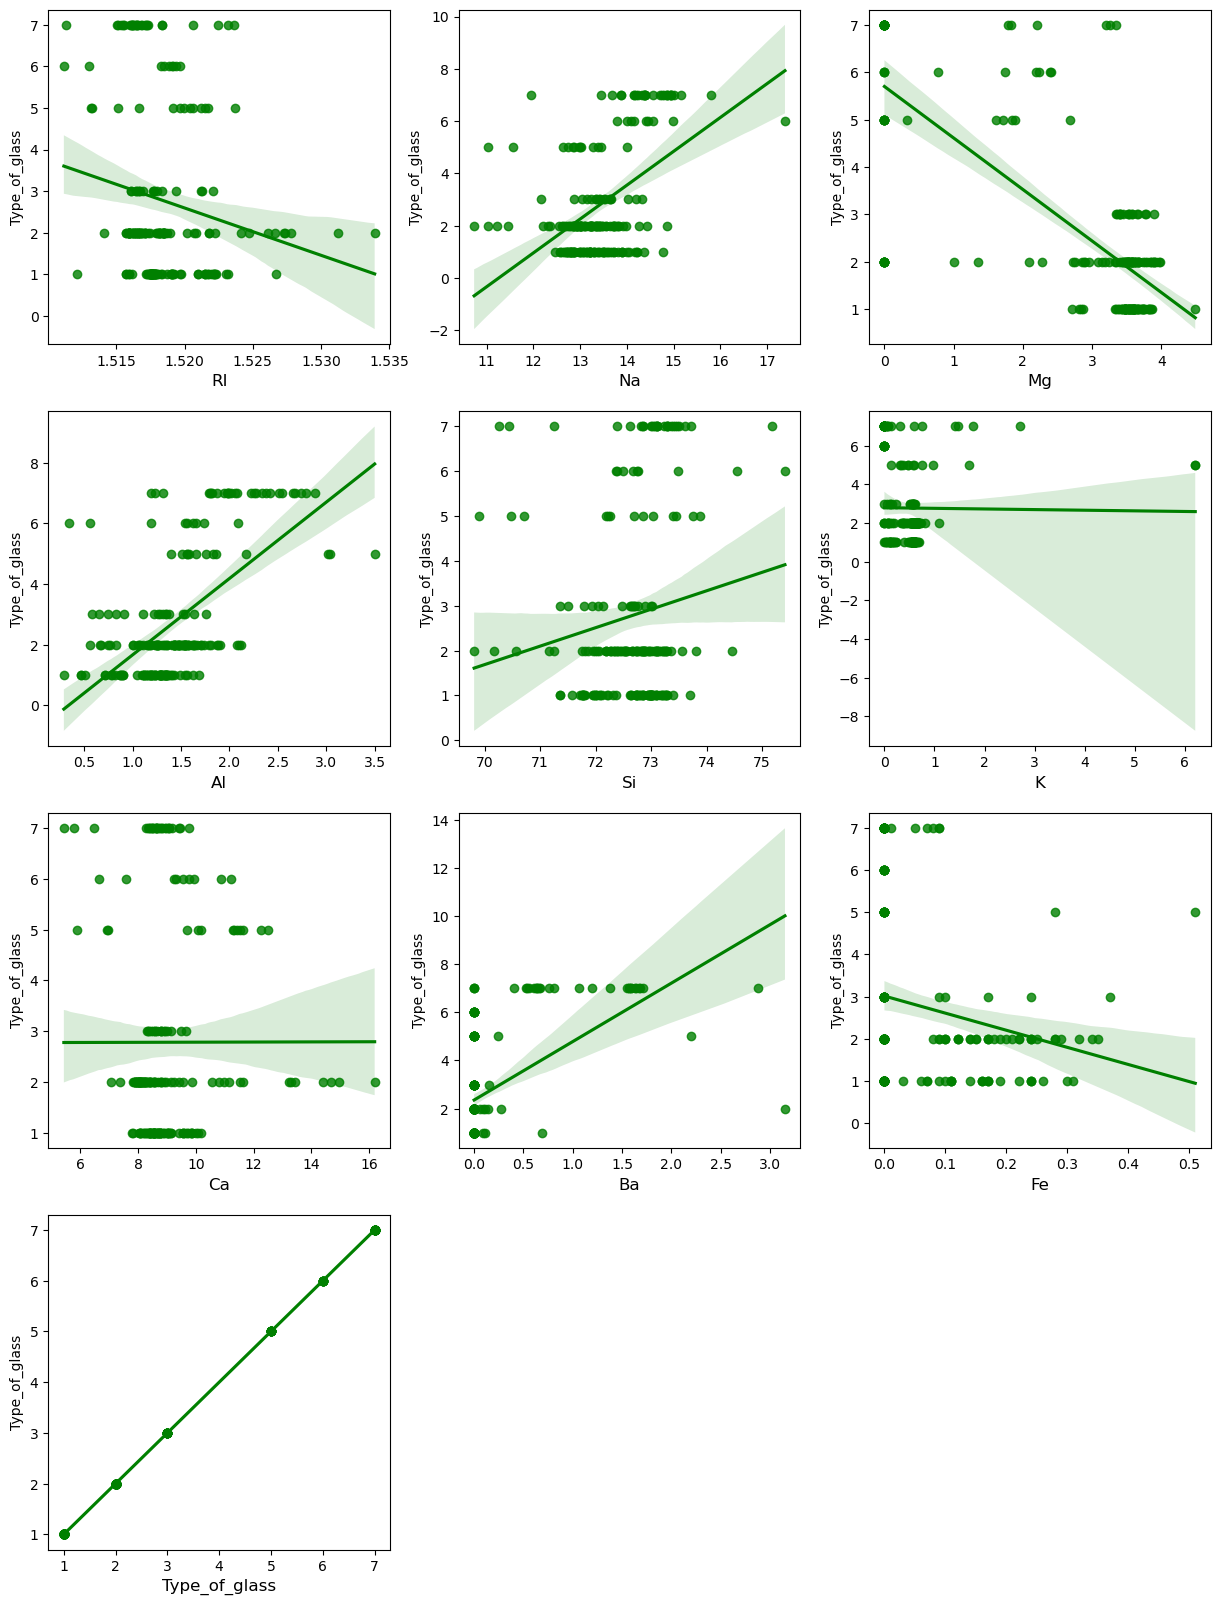

In [160]:
plt.figure(figsize=(15,20))
pltno=1
for column in data:
    if pltno<=10:
        plt.subplot(4,3,pltno)
        sns.regplot(x=data[column], y=data['Type_of_glass'], color='g')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()



#### Observation:
Regplot shows relation ship of each column with Target column  
low reltionship visible with 'Ca' and 'K' columns

#### # Box Plot

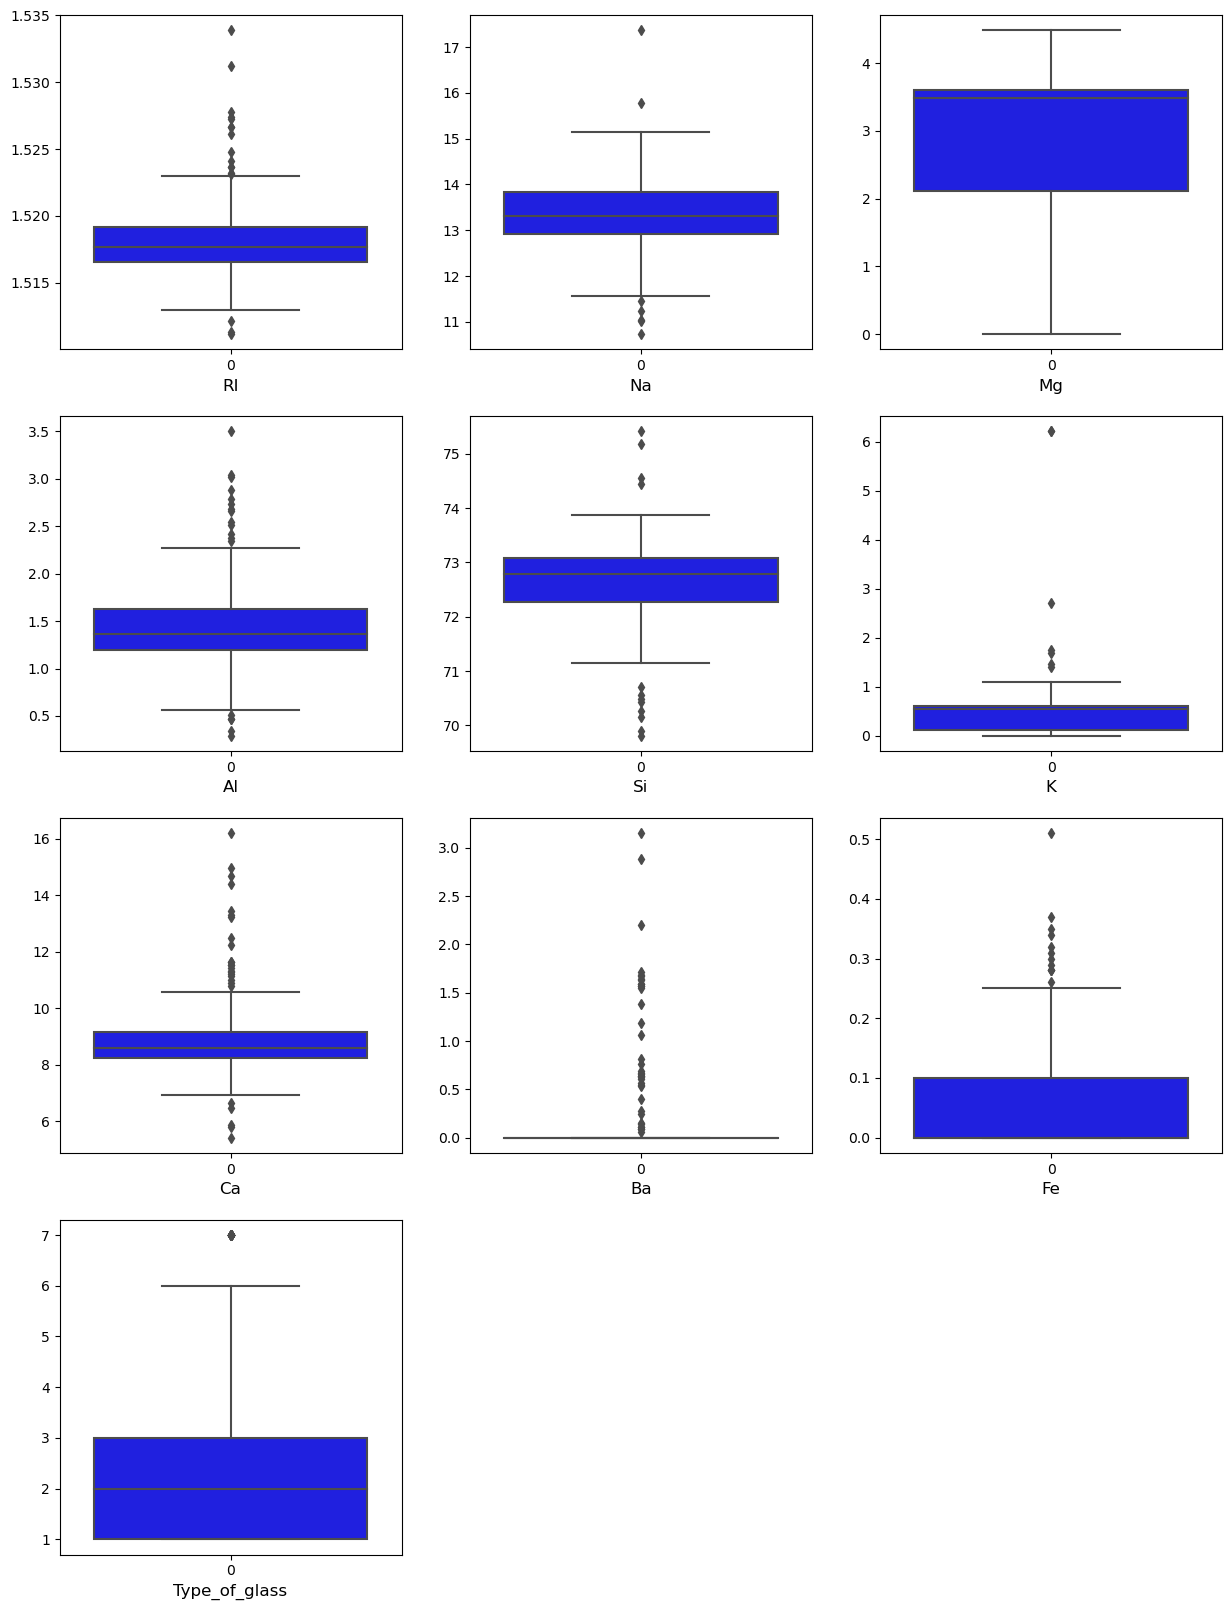

In [161]:
plt.figure(figsize=(15,20))
pltno=1
for column in data:
    if pltno<=10:
        plt.subplot(4,3,pltno)
        sns.boxplot(data=data[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Outliers seen in the data

#### # Working on Outliers

In [220]:
# Z score method for removing Outliers
from scipy import stats

data1=data

comp=pd.DataFrame()
z = abs(stats.zscore(data1))

#np.where(z > 3)

data1 = data1[(z < 3).all(axis=1)]

comp['new'] = data1.skew()
comp['old'] = data.skew()
comp


,new,old
RI,0.952733,1.625431
Na,0.371482,0.454181
Mg,-1.528849,-1.152559
Al,0.658259,0.907290
Si,-0.425450,-0.730447
K,0.303175,6.551648
Ca,1.077962,2.047054
Ba,3.188587,3.416425
Fe,1.486479,1.754327
Type_of_glass,1.284007,1.114915


In [221]:
data1.shape

(194, 10)

#### # 20 Rows removed as outlier data

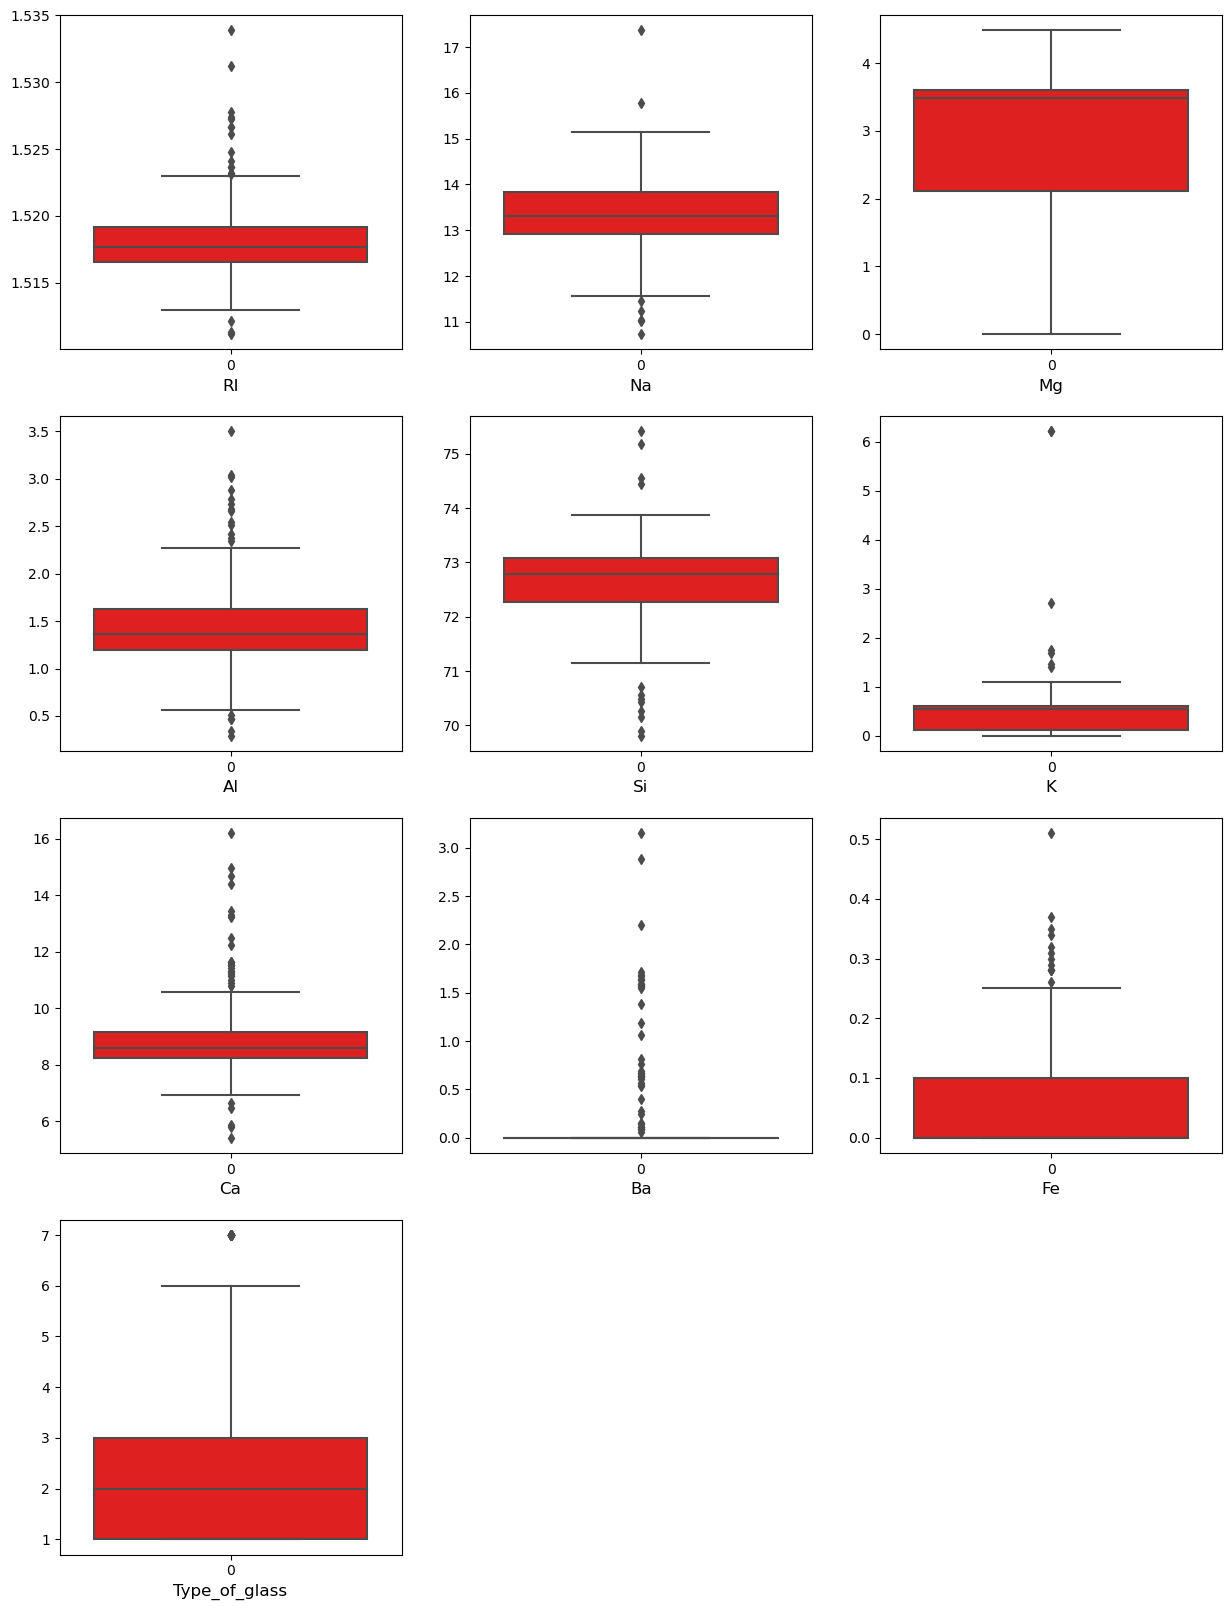

In [207]:
plt.figure(figsize=(15,20))
pltno=1
for column in data:
    if pltno<=10:
        plt.subplot(4,3,pltno)
        sns.boxplot(data=data[column], color='r')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Observation:
Still showing outliers, but if we remove more data then data will be reduced a lot

In [222]:
data1.skew()

RI               0.952733
Na               0.371482
Mg              -1.528849
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               3.188587
Fe               1.486479
Type_of_glass    1.284007
dtype: float64

#### Observations :
1. Right skewness in columns - 'Ba', 'Fe'
2. Left skewness in column - 'Mg'

In [223]:
# Log method
temp=data1[['Ba', 'Fe']]
temp=np.log(temp)
temp.skew()

Ba   NaN
Fe   NaN
dtype: float64

Data containing 0 values, so showing 'NaN' 

In [227]:
#sqrt method
temp=data1[['Ba', 'Fe']]
temp=np.sqrt(temp)
temp.skew()

Ba    2.465013
Fe    1.007885
dtype: float64

In [229]:
#cbrt method
temp=data1[['Ba', 'Fe']]
temp=np.cbrt(temp)
temp.skew()

Ba    2.207594
Fe    0.883166
dtype: float64

In [230]:
# 4th root method
temp=data1[['Ba', 'Fe']]
temp=np.power(temp,1/4)
temp.skew()

Ba    2.086103
Fe    0.832656
dtype: float64

In [231]:
# 5th root method
temp=data1[['Ba', 'Fe']]
temp=np.power(temp,1/5)
temp.skew()

Ba    2.019706
Fe    0.807109
dtype: float64

In [233]:
# 6th root method
temp=data1[['Ba', 'Fe']]
temp=np.power(temp,1/6)
temp.skew()

Ba    1.979711
Fe    0.792357
dtype: float64

#### Skewness not reducing any more for Right side

#### # Working on Left side Skewness

In [234]:
# Square Method
temp=data1[['Mg']]
temp=np.power(temp,2)
temp.skew()

Mg   -1.122806
dtype: float64

In [238]:
# Cube Method
temp=data1[['Mg']]
temp=np.power(temp,3)
temp.skew()

Mg   -0.768294
dtype: float64

In [236]:
# 4th power Method
temp=data1[['Mg']]
temp=np.power(temp,4)
temp.skew()

Mg   -0.371221
dtype: float64

In [237]:
# 5th power Method
temp=data1[['Mg']]
temp=np.power(temp,5)
temp.skew()

Mg    0.12581
dtype: float64

#### # so we select "Cube root method" for Right skewness and 4th "Power method" for left skewness

In [239]:
#cbrt method for Right Skewness
data1['Ba']=np.cbrt(data1['Ba'])
data1['Fe']=np.cbrt(data1['Fe'])

# 4th Power method for Left Skewness
data1['Mg']=np.power(data1['Mg'],4)

data1.skew()

RI               0.952733
Na               0.371482
Mg              -0.371221
Al               0.658259
Si              -0.425450
K                0.303175
Ca               1.077962
Ba               2.207594
Fe               0.883166
Type_of_glass    1.284007
dtype: float64

In [242]:
comp1=pd.DataFrame()

comp1['old'] = data.skew()
comp1['new'] = data1.skew()
comp1

,old,new
RI,1.625431,0.952733
Na,0.454181,0.371482
Mg,-1.152559,-0.371221
Al,0.907290,0.658259
Si,-0.730447,-0.425450
K,6.551648,0.303175
Ca,2.047054,1.077962
Ba,3.416425,2.207594
Fe,1.754327,0.883166
Type_of_glass,1.114915,1.284007


#### ## Data seems to be in better shape now

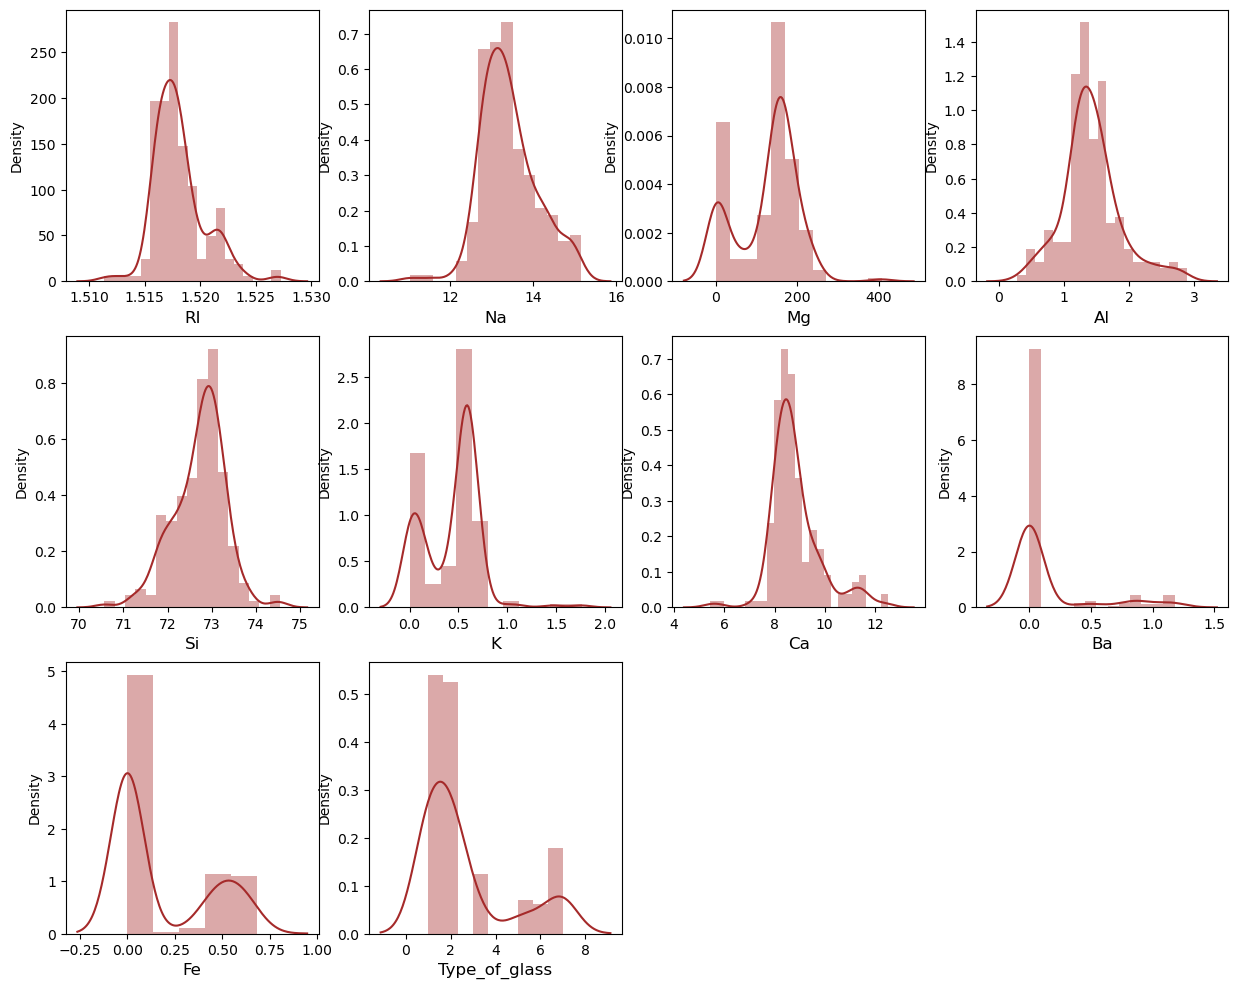

In [243]:
plt.figure(figsize=(15,12))
pltno=1
for column in data1:
    if pltno<=10:
        plt.subplot(3,4,pltno)
        sns.distplot(data1[column], color='brown')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### # Distribution Plot is also in better shape

### # Co-relation Heat Map

<AxesSubplot:>

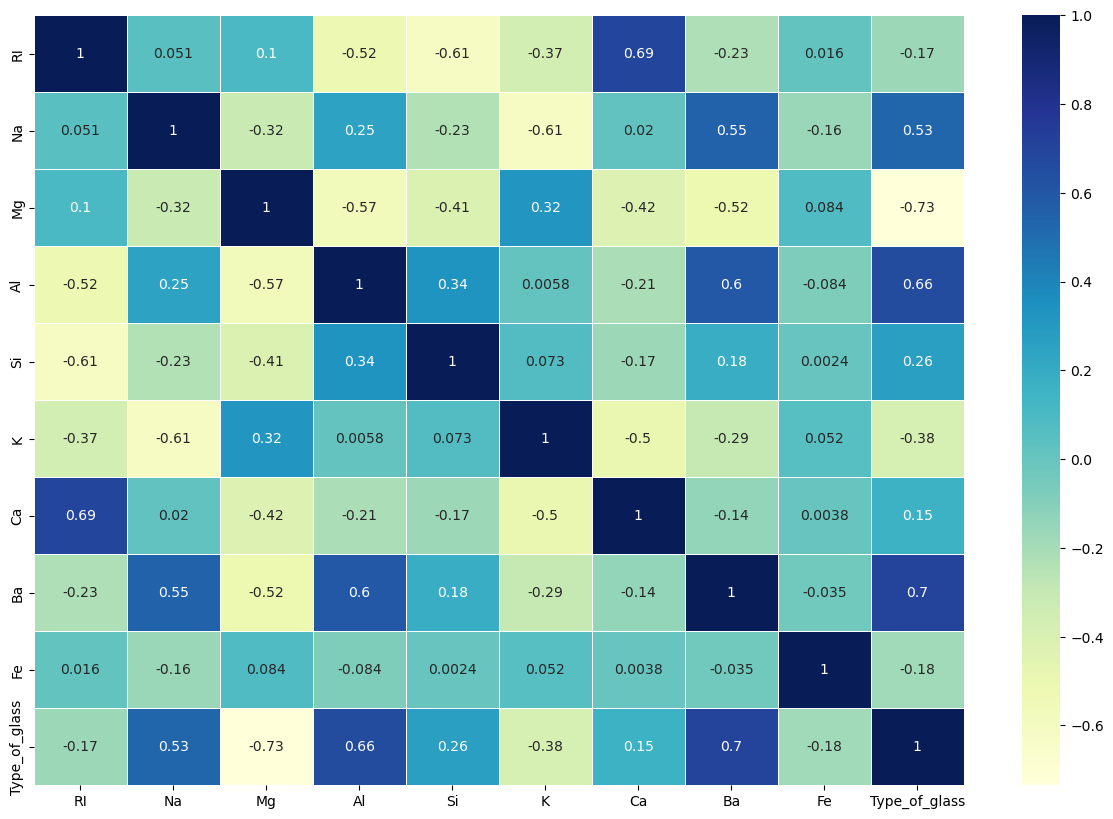

In [245]:
plt.subplots(figsize=(15,10))
sns.heatmap(data1.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

#### Observations:
1. Columns 'Ba', 'Al' and 'Na' having very good Positive co-relation with Target column
2. Column 'Mg' is having very good Negative co-relation with Target column
3. Column 'K' is having Negative co-relation with Target Column
4. Columns 'RI' and 'Ca' are 69% Positively co-related to each other

In [246]:
from sklearn.preprocessing import StandardScaler

X=data1.drop(['Type_of_glass'], axis=1)
y=data1['Type_of_glass']
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,406.429632,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,167.961600,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,158.823006,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,185.398179,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,171.725299,1.24,73.08,0.55,8.07,0.0,0.0


In [247]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)
X.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
189,-0.727959,1.419158,-1.671843,2.975928,0.221793,-1.532708,0.633854,2.070338,-0.67803
190,-0.802440,1.076668,-1.671843,3.292211,-0.189629,-1.248575,0.360187,2.696958,-0.67803
191,-0.530805,2.238153,-1.671843,1.281553,0.581788,-1.532708,-0.430406,3.147347,-0.67803
192,1.134057,1.404267,-1.671843,1.349328,1.198921,-1.532708,-0.389863,3.184306,-0.67803
193,-0.679766,1.434048,-1.671843,1.168595,1.524630,-1.532708,-0.349320,3.132346,-0.67803


### # Model Building

In [249]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [250]:
gb=GradientBoostingClassifier()
maxacc=0
maxrs=0
for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    gb.fit(x_train,y_train)
    y_pred=gb.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if maxacc < acc:
        maxacc = acc
        maxrs=i
print("Max accuracy score : ", maxacc, "   , at Random state : ", maxrs)

Max accuracy score :  0.9387755102040817    , at Random state :  386


#### Max accuracy score - 0.93 at Random State - 386

In [251]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=maxrs)
x_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
163,0.433063,0.868197,-1.236718,0.310111,-0.601051,-1.532708,0.755484,-0.415308,-0.67803
192,1.134057,1.404267,-1.671843,1.349328,1.198921,-1.532708,-0.389863,3.184306,-0.67803
116,-0.522042,-0.278397,0.422441,0.129378,0.204651,0.456224,-0.734480,-0.415308,-0.67803
133,-0.508899,-0.129489,0.422441,0.423070,-0.309627,0.882424,-0.724345,-0.415308,-0.67803
150,-0.132114,0.168328,0.131341,0.219745,-1.166757,0.527258,-0.035110,-0.415308,-0.67803


#### # Gradient Boosting Classifier

In [252]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,gb_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,gb_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,gb_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,gb_pred_test))

Accuracy Score for Test data in % :  93.87755102040816 %
Accuracy Score for Train data in % :  100.0 %

 Confusion Matrix  : 
 [[15  1  1  1  0]
 [ 0 18  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  7]]

 Classification Report  : 
               precision    recall  f1-score   support

         1.0       1.00      0.83      0.91        18
         2.0       0.95      1.00      0.97        18
         3.0       0.75      1.00      0.86         3
         5.0       0.75      1.00      0.86         3
         7.0       1.00      1.00      1.00         7

    accuracy                           0.94        49
   macro avg       0.89      0.97      0.92        49
weighted avg       0.95      0.94      0.94        49



#### # Decision Tree Classifier

In [254]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,dt_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,dt_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,dt_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,dt_pred_test))

Accuracy Score for Test data in % :  73.46938775510205 %
Accuracy Score for Train data in % :  100.0 %

 Confusion Matrix  : 
 [[12  1  4  0  1  0]
 [ 3 13  2  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  0  0]
 [ 1  0  0  0  0  6]]

 Classification Report  : 
               precision    recall  f1-score   support

         1.0       0.75      0.67      0.71        18
         2.0       0.87      0.72      0.79        18
         3.0       0.33      1.00      0.50         3
         5.0       1.00      0.67      0.80         3
         6.0       0.00      0.00      0.00         0
         7.0       1.00      0.86      0.92         7

    accuracy                           0.73        49
   macro avg       0.66      0.65      0.62        49
weighted avg       0.82      0.73      0.76        49



#### # K Neighbors Classifier

In [255]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,knn_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,knn_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,knn_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,knn_pred_test))

Accuracy Score for Test data in % :  73.46938775510205 %
Accuracy Score for Train data in % :  77.24137931034483 %

 Confusion Matrix  : 
 [[17  0  1  0  0]
 [ 6 12  0  0  0]
 [ 2  1  0  0  0]
 [ 1  1  0  1  0]
 [ 0  1  0  0  6]]

 Classification Report  : 
               precision    recall  f1-score   support

         1.0       0.65      0.94      0.77        18
         2.0       0.80      0.67      0.73        18
         3.0       0.00      0.00      0.00         3
         5.0       1.00      0.33      0.50         3
         7.0       1.00      0.86      0.92         7

    accuracy                           0.73        49
   macro avg       0.69      0.56      0.58        49
weighted avg       0.74      0.73      0.71        49



#### # Random Forest Classifier

In [256]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred_test=rf.predict(x_test)
rf_pred_train=rf.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,rf_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,rf_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,rf_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,rf_pred_test))

Accuracy Score for Test data in % :  89.79591836734694 %
Accuracy Score for Train data in % :  100.0 %

 Confusion Matrix  : 
 [[16  1  1  0  0]
 [ 3 15  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  7]]

 Classification Report  : 
               precision    recall  f1-score   support

         1.0       0.84      0.89      0.86        18
         2.0       0.94      0.83      0.88        18
         3.0       0.75      1.00      0.86         3
         5.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00         7

    accuracy                           0.90        49
   macro avg       0.91      0.94      0.92        49
weighted avg       0.90      0.90      0.90        49



#### # Extra Trees Classifier

In [257]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,et_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,et_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,et_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,et_pred_test))

Accuracy Score for Test data in % :  85.71428571428571 %
Accuracy Score for Train data in % :  100.0 %

 Confusion Matrix  : 
 [[16  1  1  0  0]
 [ 3 14  0  1  0]
 [ 0  0  3  0  0]
 [ 0  1  0  2  0]
 [ 0  0  0  0  7]]

 Classification Report  : 
               precision    recall  f1-score   support

         1.0       0.84      0.89      0.86        18
         2.0       0.88      0.78      0.82        18
         3.0       0.75      1.00      0.86         3
         5.0       0.67      0.67      0.67         3
         7.0       1.00      1.00      1.00         7

    accuracy                           0.86        49
   macro avg       0.83      0.87      0.84        49
weighted avg       0.86      0.86      0.86        49



#### # SVC

In [258]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred_test=svc.predict(x_test)
svc_pred_train=svc.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,svc_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,svc_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,svc_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,svc_pred_test))

Accuracy Score for Test data in % :  75.51020408163265 %
Accuracy Score for Train data in % :  80.6896551724138 %

 Confusion Matrix  : 
 [[15  3  0  0  0]
 [ 4 14  0  0  0]
 [ 1  2  0  0  0]
 [ 0  1  0  2  0]
 [ 0  1  0  0  6]]

 Classification Report  : 
               precision    recall  f1-score   support

         1.0       0.75      0.83      0.79        18
         2.0       0.67      0.78      0.72        18
         3.0       0.00      0.00      0.00         3
         5.0       1.00      0.67      0.80         3
         7.0       1.00      0.86      0.92         7

    accuracy                           0.76        49
   macro avg       0.68      0.63      0.65        49
weighted avg       0.72      0.76      0.73        49



#### # Ada Boost Classifier

In [259]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
ab_pred_test=ab.predict(x_test)
ab_pred_train=ab.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,ab_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,ab_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,ab_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,ab_pred_test))

Accuracy Score for Test data in % :  51.02040816326531 %
Accuracy Score for Train data in % :  48.96551724137931 %

 Confusion Matrix  : 
 [[16  2  0  0  0]
 [16  2  0  0  0]
 [ 3  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  0  0  7]]

 Classification Report  : 
               precision    recall  f1-score   support

         1.0       0.46      0.89      0.60        18
         2.0       0.29      0.11      0.16        18
         3.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         3
         7.0       1.00      1.00      1.00         7

    accuracy                           0.51        49
   macro avg       0.35      0.40      0.35        49
weighted avg       0.42      0.51      0.42        49



#### # Bagging Classifier

In [260]:
bg=BaggingClassifier()
bg.fit(x_train,y_train)
bg_pred_test=bg.predict(x_test)
bg_pred_train=bg.predict(x_train)
print('Accuracy Score for Test data in % : ', accuracy_score(y_test,bg_pred_test)*100, "%")
print('Accuracy Score for Train data in % : ', accuracy_score(y_train,bg_pred_train)*100, "%")
print("\n Confusion Matrix  : \n", confusion_matrix(y_test,bg_pred_test))
print("\n Classification Report  : \n", classification_report(y_test,bg_pred_test))

Accuracy Score for Test data in % :  89.79591836734694 %
Accuracy Score for Train data in % :  100.0 %

 Confusion Matrix  : 
 [[16  1  1  0  0]
 [ 3 15  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  7]]

 Classification Report  : 
               precision    recall  f1-score   support

         1.0       0.84      0.89      0.86        18
         2.0       0.94      0.83      0.88        18
         3.0       0.75      1.00      0.86         3
         5.0       1.00      1.00      1.00         3
         7.0       1.00      1.00      1.00         7

    accuracy                           0.90        49
   macro avg       0.91      0.94      0.92        49
weighted avg       0.90      0.90      0.90        49



###  # Cross Validation Score

In [261]:
from sklearn.model_selection import cross_val_score

In [263]:
# Cross Val score for Decision Tree Classifier
cv_score_dt = cross_val_score(dt,X,y,cv=5,scoring='accuracy')
print(cv_score_dt)
print('Mean CV Score : ', cv_score_dt.mean())
print('difference in score  : ', (accuracy_score(y_test,dt_pred_test)-cv_score_dt.mean())*100, "%")

[0.61538462 0.66666667 0.66666667 0.51282051 0.60526316]
Mean CV Score :  0.6133603238866396
difference in score  :  12.133355366438082 %


In [264]:
# Cross Val score for K Neighbors Classifier
cv_score_knn = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(cv_score_knn)
print('Mean CV Score : ', cv_score_knn.mean())
print('difference in score  : ', (accuracy_score(y_test,knn_pred_test)-cv_score_knn.mean())*100, "%")

[0.64102564 0.76923077 0.69230769 0.61538462 0.76315789]
Mean CV Score :  0.696221322537112
difference in score  :  3.847255501390845 %


In [265]:
# Cross Val score for Random Forest Classifier
cv_score_rf = cross_val_score(rf,X,y,cv=5,scoring='accuracy')
print(cv_score_rf)
print('Mean CV Score : ', cv_score_rf.mean())
print('difference in score  : ', (accuracy_score(y_test,rf_pred_test)-cv_score_rf.mean())*100, "%")

[0.69230769 0.76923077 0.76923077 0.58974359 0.81578947]
Mean CV Score :  0.7272604588394063
difference in score  :  17.06987248340631 %


In [266]:
# Cross Val score for Extra Trees Classifier
cv_score_et = cross_val_score(et,X,y,cv=5,scoring='accuracy')
print(cv_score_et)
print('Mean CV Score : ', cv_score_et.mean())
print('difference in score  : ', (accuracy_score(y_test,et_pred_test)-cv_score_et.mean())*100, "%")

[0.69230769 0.71794872 0.76923077 0.61538462 0.81578947]
Mean CV Score :  0.722132253711201
difference in score  :  13.501060343165605 %


In [267]:
# Cross Val score for SVC
cv_score_svc = cross_val_score(svc,X,y,cv=5,scoring='accuracy')
print(cv_score_svc)
print('Mean CV Score : ', cv_score_svc.mean())
print('difference in score  : ', (accuracy_score(y_test,svc_pred_test)-cv_score_svc.mean())*100, "%")

[0.58974359 0.74358974 0.66666667 0.71794872 0.71052632]
Mean CV Score :  0.6856950067476383
difference in score  :  6.9407034068688205 %


In [268]:
# Cross Val score for Gradient Boosting Classifier
cv_score_gb = cross_val_score(gb,X,y,cv=5,scoring='accuracy')
print(cv_score_gb)
print('Mean CV Score : ', cv_score_gb.mean())
print('difference in score  : ', (accuracy_score(y_test,gb_pred_test)-cv_score_gb.mean())*100, "%")

[0.71794872 0.74358974 0.82051282 0.58974359 0.71052632]
Mean CV Score :  0.7164642375168692
difference in score  :  22.231127268721252 %


In [269]:
# Cross Val score for Ada Boost Classifier
cv_score_ab = cross_val_score(ab,X,y,cv=5,scoring='accuracy')
print(cv_score_ab)
print('Mean CV Score : ', cv_score_ab.mean())
print('difference in score  : ', (accuracy_score(y_test,ab_pred_test)-cv_score_ab.mean())*100, "%")

[0.43589744 0.51282051 0.53846154 0.51282051 0.42105263]
Mean CV Score :  0.4842105263157895
difference in score  :  2.599355531686359 %


In [270]:
# Cross Val score for Bagging Classifier
cv_score_bg = cross_val_score(bg,X,y,cv=5,scoring='accuracy')
print(cv_score_bg)
print('Mean CV Score : ', cv_score_bg.mean())
print('difference in score  : ', (accuracy_score(y_test,bg_pred_test)-cv_score_bg.mean())*100, "%")

[0.64102564 0.69230769 0.64102564 0.46153846 0.68421053]
Mean CV Score :  0.6240215924426451
difference in score  :  27.39375912308243 %


#### # Obsevations:  
we have least difference in accuracy score and CV score for 'Ada Boost Classifier' (2.59%) with accuracy of 48%  
Also we have second least difference in accuracy score and CV score for 'K Neighbors Classifier' (3.84%) with accuracy of 69%

#### # So finally we select " K Neighbors Classifier " as our final model on the basis of accuracy of 69% compared to 48%

In [272]:
from sklearn.model_selection import GridSearchCV

In [273]:
prams={'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 4, 5],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 60],}

In [274]:
gscv=GridSearchCV(knn,prams,cv=7)
gscv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [275]:
gscv.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [276]:
gscv.best_score_

0.7248299319727891

#### # Executing the final model with these parameters

In [278]:
final_model=KNeighborsClassifier(algorithm= 'auto',leaf_size= 10, n_neighbors= 1, p= 1, weights= 'uniform')
final_model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of the Final Model is :  ', accuracy*100,"%" )

Accuracy of the Final Model is :   81.63265306122449 %


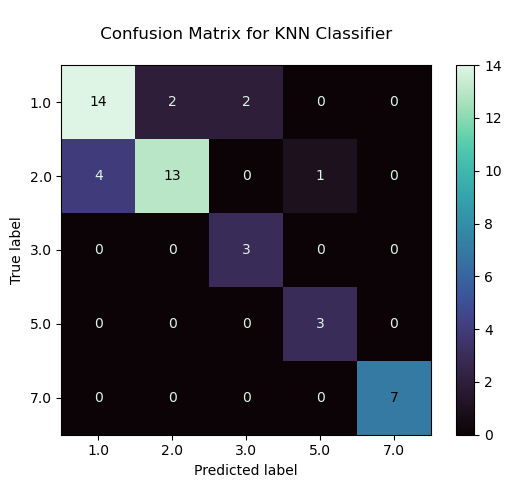

In [279]:
from sklearn import metrics
class_names = data.columns
metrics.plot_confusion_matrix(final_model.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\n Confusion Matrix for KNN Classifier \n')
plt.show()

### # Saving the Model

In [281]:
import pickle
pickle.dump(final_model,open('Final_model_Glass_identification','wb'))

In [283]:
model=pickle.load(open('Final_model_Glass_identification','rb'))

In [284]:
prediction = model.predict(x_test)

In [287]:
df=pd.DataFrame()
arr=np.array(y_test)
df['original']=arr
df['predicted']=prediction
df

,original,predicted
0,2.0,2.0
1,1.0,1.0
2,2.0,2.0
3,2.0,2.0
4,2.0,2.0
5,7.0,7.0
6,5.0,5.0
7,1.0,1.0
8,1.0,1.0
9,7.0,7.0


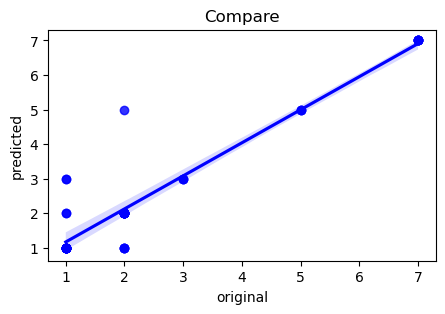

In [289]:
plt.figure(figsize=(5,3))
sns.regplot(x=df['original'], y=df['predicted'], color='blue')
plt.title('Compare')
plt.show()